<a href="https://colab.research.google.com/github/ahammedshaneebnk/ML_Support_Vector_Machines_Exercises/blob/main/handwritten_digit_recognition_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Question:**

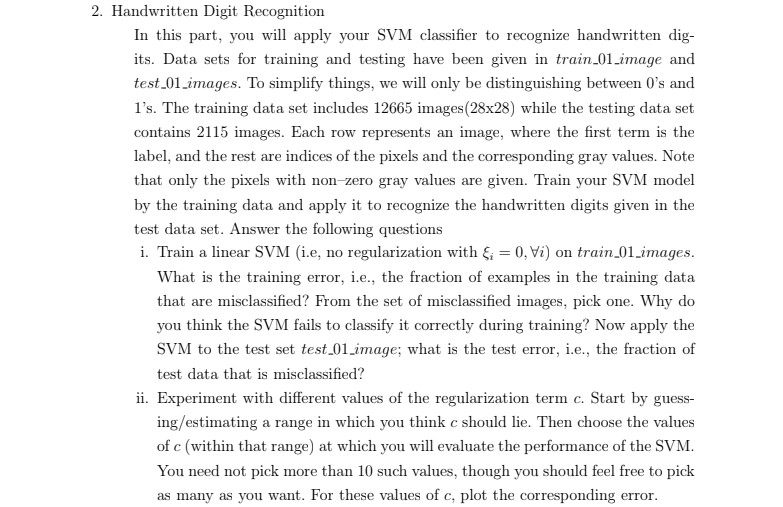

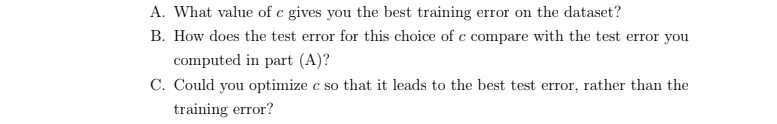

#**Answer:**

##**Data Analysis**

###***Read Data***

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from PIL import Image as im

In [ ]:
# read training data set and convert into pandas dataframe
df = pd.read_csv('train_01_images', header=None)

# display the training data
print(f"Training Data without Preprocessing:\n{df}")

Training Data without Preprocessing:
                                                       0
0      -1 127:51 128:159 129:253 130:159 131:50 154:4...
1      +1 158:124 159:253 160:255 161:63 185:96 186:2...
2      +1 124:145 125:255 126:211 127:31 151:32 152:2...
3      +1 152:5 153:63 154:197 180:20 181:254 182:230...
4      +1 151:1 152:168 153:242 154:28 179:10 180:228...
...                                                  ...
12660  -1 128:7 129:105 130:105 131:93 155:15 156:160...
12661  +1 158:86 159:254 160:118 186:210 187:253 188:...
12662  +1 132:164 133:254 134:142 159:5 160:225 161:2...
12663  -1 127:7 128:88 129:133 130:133 131:226 132:21...
12664  +1 160:55 161:230 162:83 187:12 188:158 189:24...

[12665 rows x 1 columns]


* There are **12665** instances.

###***Data Preprocessing***

* Each image corresponds to 28x28 pixels.
* Datapreprocessing is needed in order to **convert the given data of features into 28*28 = 784 columns and one column for the label**.

In [ ]:
# Function to convert the data into 784+1 columns

def data_conv(df):

  data_list = []

  for i in range(df.shape[0]):
    row_arr = np.zeros(28*28 + 1)
    # first separation with space
    sep1 = df.iloc[i,0].split()
    row_arr[0] = int(sep1[0])

    sep2 = []
    for j in range(1, len(sep1)):
      # second separation with colon
      sep2.append(sep1[j].split(':'))

    for k in range(len(sep2)):
      # adding gray value corresponding to the index
      row_arr[int(sep2[k][0]) + 1] = int(sep2[k][1])
      
    data_list.append(row_arr)
  df_new = pd.DataFrame(data_list)
  return df_new

In [ ]:
# perform preprocessing on the training data
df_mod = data_conv(df)
# display the preprocessed training data (first 10 instances)
print("Preprocessed Trainig Data:\n")
print(df_mod.head(10))

Preprocessed Trainig Data:

   0    1    2    3    4    5    6    ...  778  779  780  781  782  783  784
0 -1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5 -1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
6  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
7  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
8 -1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
9 -1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[10 rows x 785 columns]


#### ***Crossvalidation with Images***

In [ ]:
# Function to convert the array into image
def show_img(df, i):
  plt.imshow(im.fromarray(np.array(df.iloc[i,1:]).reshape(28,28)))
  plt.title('correct label = %d'%(df.iloc[i,0]))

* Validating whether the preprocessing was successful by displaying the **first 10 image data** from the processed array of features.

First 10 instances in the training data:



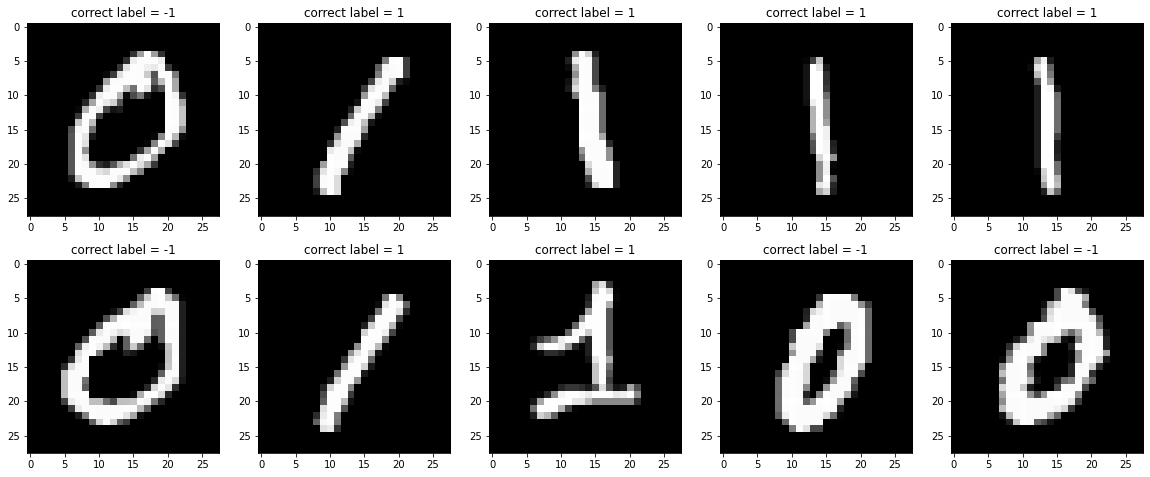

In [ ]:
print(f"First 10 instances in the training data:\n")
plt.figure(figsize=(20,8))
for i in range(10):
  plt.subplot(2,5,i+1)
  show_img(df_mod, i)

* As per the observation, preprocessing was successful.

### ***Read Test Data***

In [ ]:
# read test data
df_test = df = pd.read_csv('test_01_images', header=None)
# display the test data
print(f"Test Data before Preprocessing:\n{df}")

Test Data before Preprocessing:
                                                      0
0     +1 128:38 129:254 130:109 156:87 157:252 158:8...
1     -1 124:11 125:150 126:253 127:202 128:31 152:3...
2     +1 156:77 157:254 158:107 159:3 183:19 184:227...
3     -1 123:61 124:3 125:42 126:118 127:193 128:118...
4     -1 152:17 153:66 154:138 155:255 156:253 157:1...
...                                                 ...
2110  +1 158:3 159:164 160:254 161:254 162:12 185:5 ...
2111  -1 151:5 152:55 153:180 154:253 155:255 156:25...
2112  +1 154:7 155:204 156:253 157:226 182:82 183:25...
2113  -1 157:110 158:109 159:109 160:47 182:21 183:1...
2114  +1 127:139 128:255 129:109 130:1 155:199 156:2...

[2115 rows x 1 columns]


In [ ]:
# perform preprocessing
df_test_mod = data_conv(df_test)
print("Preprocessed Test Data (First 5 Instances):\n")
print(df_test_mod.head(5))

Preprocessed Test Data (First 5 Instances):

   0    1    2    3    4    5    6    ...  778  779  780  781  782  783  784
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1 -1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3 -1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4 -1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[5 rows x 785 columns]


First 5 instances in the Test data:



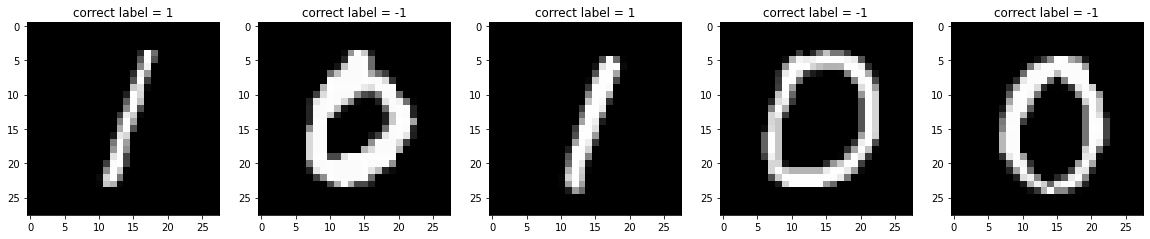

In [ ]:
# validation with image data
print(f"First 5 instances in the Test data:\n")
plt.figure(figsize=(20,8))
for i in range(5):
  plt.subplot(1,5,i+1)
  show_img(df_test_mod, i)

* Test Data Preprocessing was also successfully performed.

##**SVM Implementation**

###**Function to Find Error**

In [ ]:
# Function to find the error % and wrongly classified data indices
def err_fun(model, df):

  # prediction with the learned model
  predicted_labels = model.predict(df.iloc[:,1:])
  error_count = 0
  error_ind = []

  # comparison with actual label
  for i in range(df.shape[0]):
    if predicted_labels[i] != df.iloc[i,0]:
      error_count = error_count + 1
      error_ind.append(i)

  # returns the error % and indices of the wronly classified data
  return (error_count * 100 / df.shape[0]), error_ind

###**Function to Train SVM: Linear Kernel**

In [ ]:
# This function will train the SVM and do all other needed operations
def svm_link(df, dft, c):

  # training
  model = svm.SVC(kernel='linear', C = c)
  model.fit(df.iloc[:,1:], df.iloc[:,0])

  # support vector details
  print(f"{30*'==='}\n")
  print(f"Softmargin SVM with C = {c}\n")
  print(f"There are {len(model.support_vectors_)} support vectors in total.")

  error = err_fun(model, df)
  print(f"\nTraining Error = {error[0]} %\n")
  print(f"Testing Error = {err_fun(model, dft)[0]} %\n")

  print(f"There were {len(error[1])} misclassifications during training.")
  print(f"The indices of them are {error[1]}\n")
  print(f"For Index = {error[1][0]}")
  show_img(df_mod, error[1][0])
  print(f"Predicted Label = \
  {model.predict(np.array(df_mod.iloc[error[1][0],1:]).reshape(1, -1))[0]}")

In [ ]:
# secondary function to implement SVM
# this return the training error and test error for varying c values
def svm_lin(df, dft, c):
  model = svm.SVC(kernel='linear', C = c)
  model.fit(df.iloc[:,1:], df.iloc[:,0])
  tr_error = err_fun(model, df)[0]
  tst_error = err_fun(model, dft)[0]
  return tr_error, tst_error

###**SVM with Linear Kernel, C = 1e-7**


Softmargin SVM with C = 1e-07

There are 178 support vectors in total.

Training Error = 0.07895775759968417 %

Testing Error = 0.04728132387706856 %

There were 10 misclassifications during training.
The indices of them are [314, 1230, 2823, 4495, 4611, 6030, 6626, 8184, 8546, 9326]

For Index = 314
Predicted Label =   1.0


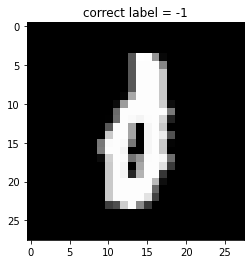

In [ ]:
svm_link(df_mod, df_test_mod, .0000001)

* The **training error was around 0.079% and testing error was around 0.047%** when implemented with very low C value (1e-7).
* During training **10 misclassifications** occurred.
* One of the wrongly predicted image was analyzed (index = 314) by displaying the same.
* The image **actually is a zero** (label = -1). In this image, the **width is less**. The **hollow portion in the middle has less area**. Due to these factors, **SVM might have predicted it as 1** (label = +1).

### **Experiment with C Values**

In [ ]:
# 10 C values from 1e-7 to 100 as a multiple of 10
n = 10
tr_err = np.zeros(n)
tst_err = np.zeros(n)
cc = np.zeros(n)
# assign c values
for i in range(len(cc)):
  cc[i] = 1e-8 * 10**(i+1)
# find corresponding training error and test error
for i in range(n):
  tr_err[i], tst_err[i] = svm_lin(df_mod, df_test_mod, cc[i])

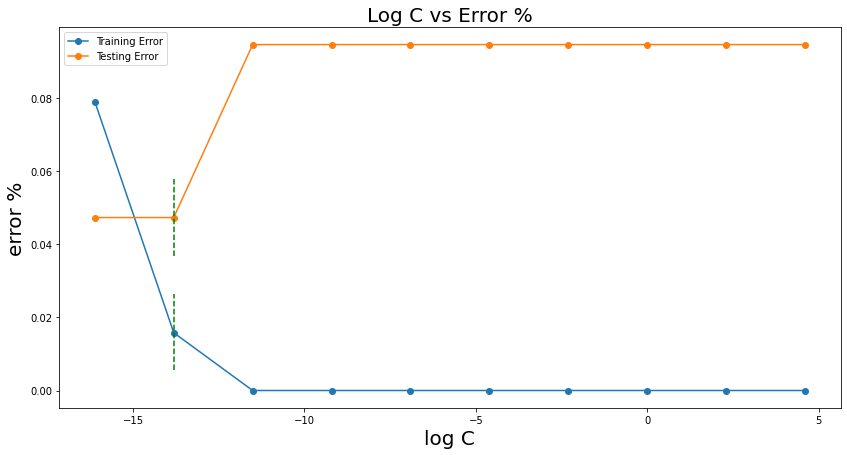

In [ ]:
# error plot
plt.figure(figsize=(14,7))
# training error
plt.plot(np.log(cc), tr_err, '-o')
# test error
plt.plot(np.log(cc), tst_err, '-o')
plt.legend(['Training Error', 'Testing Error'])
plt.xlabel('log C', fontsize=20)
plt.ylabel('error %', fontsize=20)
plt.title('Log C vs Error %', fontsize=20)
plt.axvline(x=np.log(cc[1]), color='green', linestyle='--', ymin=0.1, ymax=0.3)
plt.axvline(x=np.log(cc[1]), color='green', linestyle='--', ymin=0.4, ymax=0.6)

In [ ]:
print(f"The second C value = {cc[1]}")
print(f"\nCorresponding Errors are as follows:\n")
print(f"Training Error = {tr_err[1]} %")
print(f"Testing Error = {tst_err[1]} %")

The second C value = 1e-06

Corresponding Errors are as follows:

Training Error = 0.015791551519936834 %
Testing Error = 0.04728132387706856 %


* As observed from the above plot, for the **2nd C value (1e-6)**, both **training error and test error are low**, therefore it is the best C among the experimented values.
* For this C value, the **training error was around 0.016% and test error was around 0.047 %**.

##**Conclusion**

* The given datasets have been read and **preprocessed successfully**.
* The **preprocessing was validated by displaying the corresponding images**.
* The **training data had 12665 instances** (images) and the **test data had 2115**.
* After preprocessing, the **number of columns was 785**. The **number of features was 784**.
* A **Linear SVM** with **very low C = 1e-7** was run and a **training error of around 0.079% and testing error of 0.047%** were obtained. There were **10 misclassifications**.
* One of the misclassified digit was studied and reasoned why might have the SVM has wrongly predicted the same. In the chosed example, the **SVM predicted 1 for a zero digit due to the conusion with the width and hollow portion area (thought)**.
* Further, **linear SVM was run with different C values** ranging from 1e-7 to 100 and the **best C value was found to be 1e-6** due to which it has the lowest training error and test error (combined observation). **For this value, the model is neither over fitted nor under fitted**.

##**Submitted By:**

####Ahammed Shaneeb N K

####M1, AI: Roll No - 2